In [2]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [1]:
years = ['2004','2005','2006','2007','2008','2009','2010','2011','2012']#,'2018']
len(years)

9

In [3]:
data = []
for year in years:
    website_url = requests.get('https://www.basketball-reference.com/players/j/jamesle01/gamelog/'+year)
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        data.append(cell.get_text())

In [4]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))

In [5]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers.remove('G')
headers.remove('Date')
headers.remove('Age')
headers.remove('Tm')
headers.remove('\xa0')
headers = ['G', 'Date', 'Age', 'Tm', 'HC'] + headers
print(headers)

['G', 'Date', 'Age', 'Tm', 'HC', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [6]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [7]:
df1 = df1.drop(['\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,@,SAC,42:00,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,@,PHO,41:00,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,@,POR,39:00,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,,DEN,41:00,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,@,IND,44:00,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [8]:
df1['HC'] = df1['HC'].map({'@': 'Away', '': 'Home'})

In [9]:
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,Away,SAC,42:00,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,Away,PHO,41:00,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,Away,POR,39:00,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,Home,DEN,41:00,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,Away,IND,44:00,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [10]:
df1.MP = df1.MP.str[:-3]
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,Away,SAC,42,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,Away,PHO,41,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,Away,POR,39,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,Home,DEN,41,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,Away,IND,44,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [11]:
df2 = df1.drop(['G','Date', 'HC','Opp', '+/-'], axis=1)

In [12]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,42,12,20,.600,0,2,.000,1,3,.333,2,4,6,9,4,0,2,3,24.7,25
1,41,8,17,.471,1,5,.200,4,7,.571,2,10,12,8,1,0,7,1,14.7,21
2,39,3,12,.250,0,1,.000,2,2,1.000,0,4,4,6,2,0,2,3,5.0,8
3,41,3,11,.273,0,2,.000,1,1,1.000,2,9,11,7,2,3,2,1,11.2,7
4,44,8,18,.444,1,2,.500,6,7,.857,0,5,5,3,0,0,7,2,9.0,23


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with 

AxesSubplot(0.127273,0.125;0.617727x0.755)


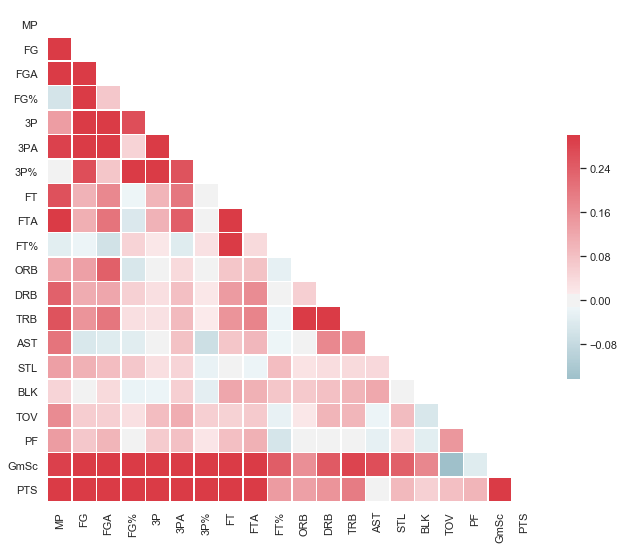

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [16]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,0.488857,0.660938,-0.081052,1.082158,-0.958452,-0.839527,-1.133468,-1.517029,-1.283767,-2.310279,0.654144,-0.727431,-0.395553,0.781809,1.667941,-0.888760,-0.74979,0.822840,0.315937,-0.788594
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,0.654144,1.525154,1.625730,0.410315,-0.539251,-0.888760,2.05480,-0.713574,-0.898662,-2.332176
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,-1.059564,-0.727431,-1.069315,-0.332673,0.196480,-0.888760,-0.74979,0.822840,-2.076822,-2.450913
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,0.654144,1.149723,1.288849,0.038821,0.196480,2.267712,-0.74979,-0.713574,-1.323771,-0.551119
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,-1.059564,-0.352000,-0.732434,-1.447155,-1.274982,-0.888760,2.05480,0.054633,-1.590982,-1.263542


AxesSubplot(0.127273,0.125;0.617727x0.755)


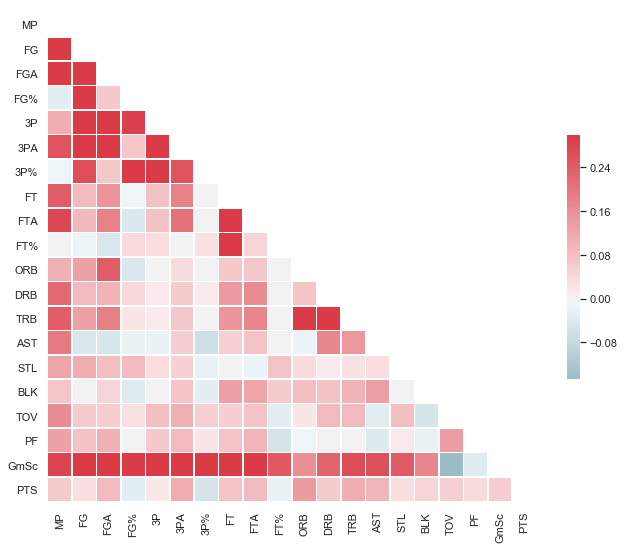

In [17]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

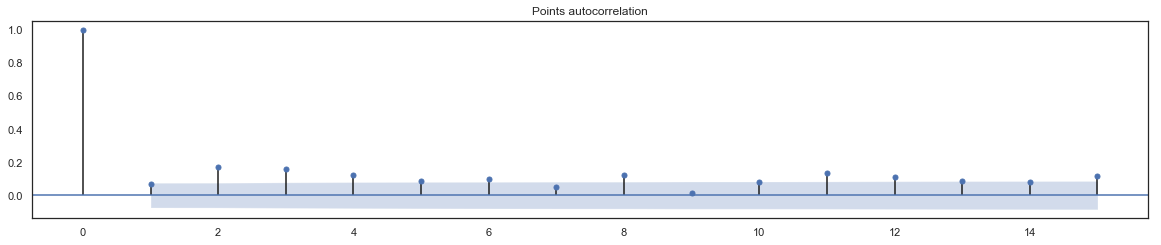

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

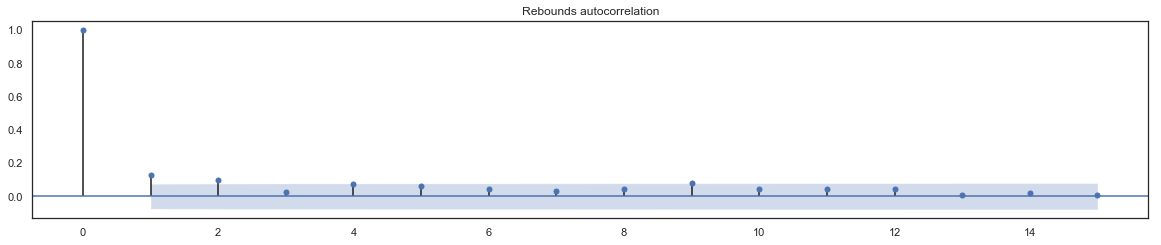

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

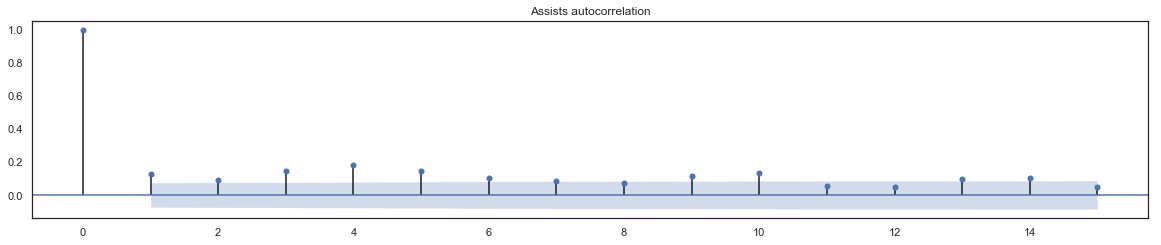

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

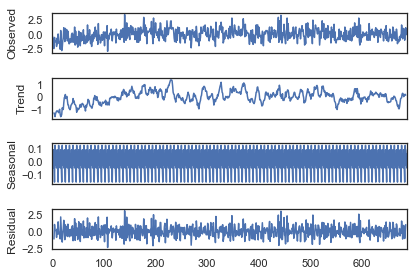

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

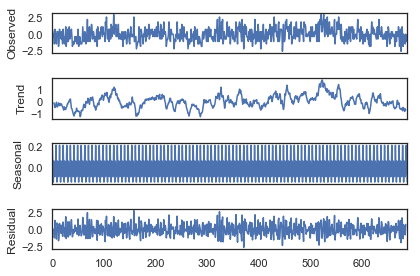

In [22]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

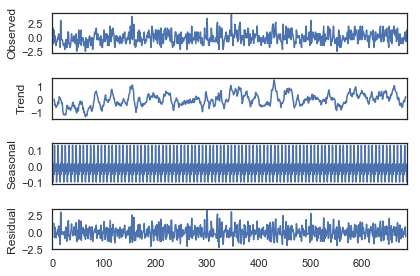

In [23]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [24]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']
df2['HC'] = df1['HC']
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp,HC
0,0.488857,0.660938,-0.081052,1.082158,-0.958452,-0.839527,-1.133468,-1.517029,-1.283767,-2.310279,...,0.781809,1.667941,-0.888760,-0.74979,0.822840,0.315937,-0.313645,2003-10-29,SAC,Away
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,0.410315,-0.539251,-0.888760,2.05480,-0.713574,-0.898662,-0.788594,2003-10-30,PHO,Away
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,-0.332673,0.196480,-0.888760,-0.74979,0.822840,-2.076822,-2.332176,2003-11-01,POR,Away
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,0.038821,0.196480,2.267712,-0.74979,-0.713574,-1.323771,-2.450913,2003-11-05,DEN,Home
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,-1.447155,-1.274982,-0.888760,2.05480,0.054633,-1.590982,-0.551119,2003-11-07,IND,Away


In [25]:
df2['Date'] = pd.to_datetime(df2['Date'])
#df2['Year'] = df2['Date'].dt.year
#df2['Month'] = df2['Date'].dt.month
#df2['Week'] = df2['Date'].dt.week
#df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [26]:
df2 = df2.drop(['Date'], axis=1)

In [33]:
df4 = df2.copy(deep=True)
df4['CurrOpp'] = df4.Opp.shift(-1)
df4['CurrHC'] = df4.HC.shift(-1)
#df4['Year'] = df4.Year.shift(-1)
#df4['Month'] = df4.Month.shift(-1)
#df4['Week'] = df4.Week.shift(-1)
#df4['Yearday'] = df4.Yearday.shift(-1)
df4['CurrRest'] = df4.Rest.shift(-1)

In [34]:
df4.to_csv('LeBronJamesStatLog.csv')

In [35]:
dum1 = pd.get_dummies(df4['Opp'])
dum2 = pd.get_dummies(df4['HC'])
dum3 = pd.get_dummies(df4['CurrOpp'])
dum4 = pd.get_dummies(df4['CurrHC'])
df4 = pd.concat([df4, dum1, dum2, dum3, dum4], axis=1)
df4 = df4.drop(['Opp', 'HC', 'CurrOpp', 'CurrHC'], axis=1)

In [168]:
standings = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW','HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK','OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
#rankings = [27, 4, 23, 24, 20, 6, 28, 14, 19, 3, 1, 8, 18, 21, 29, 15, 16, 12, 9, 22, 10, 26, 5, 30, 7, 25, 13, 2, 11]
for x in range(29):
    df4 = df4.replace(standings[x],x)
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.933645,1.526774,0.818212,0.873660,2,Home,2.0,7.0,Away,2.0
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,-1.472792,0.165954,-0.104220,-0.081542,7,Away,2.0,3.0,Away,2.0
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-1.472792,0.165954,0.126388,-0.354456,3,Away,2.0,25.0,Away,2.0
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.222943,1.526774,-1.691347,-0.627371,25,Away,2.0,18.0,Away,2.0
5,-1.246549,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.144649,0.165954,-1.203000,-0.763829,18,Away,2.0,29.0,Away,2.0


In [169]:
df4 = df4.replace('Home',1)
df4 = df4.replace('Away',0)
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.933645,1.526774,0.818212,0.873660,2,1,2.0,7.0,0.0,2.0
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,-1.472792,0.165954,-0.104220,-0.081542,7,0,2.0,3.0,0.0,2.0
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-1.472792,0.165954,0.126388,-0.354456,3,0,2.0,25.0,0.0,2.0
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.222943,1.526774,-1.691347,-0.627371,25,0,2.0,18.0,0.0,2.0
5,-1.246549,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.144649,0.165954,-1.203000,-0.763829,18,0,2.0,29.0,0.0,2.0


In [36]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [37]:
print(len(df4))
df4 = df4[df4['Rest']<20]
print(len(df4))

651
644


In [38]:
df4 = df4.drop(['3P%','FG%','FT%'], axis=1)
#df4 = df4.drop(['ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR','SAC', 'SAS', 'TOR', 'UTA', 'Year','Month', 'Week', 'Yearday'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
#df4['Opp'] = df4['Opp']/30
df4['Rest'] = df4['Rest']/20
#df4['CurrOpp'] = df4['CurrOpp']/30
df4['CurrRest'] = df4['CurrRest']/20
df4.head()

,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,...,SAS,SEA,TOR,UTA,WAS,Away,Home,PredPts,PredTrb,PredAst
1,0.290726,-0.574846,-0.685871,-0.238307,0.405310,-0.702773,-0.402556,0.654144,1.525154,1.625730,...,0,0,0,0,0,1,0,-2.332176,-1.069315,-0.332673
2,-0.105536,-2.119575,-1.693901,-0.958452,-1.254473,-1.245611,-1.504069,-1.059564,-0.727431,-1.069315,...,0,0,0,0,0,0,1,-2.450913,1.288849,0.038821
3,0.290726,-2.119575,-1.895508,-0.958452,-0.839527,-1.517029,-1.724372,0.654144,1.149723,1.288849,...,0,0,0,0,0,1,0,-0.551119,-0.732434,-1.447155
4,0.885119,-0.574846,-0.484264,-0.238307,-0.839527,-0.159936,-0.402556,-1.059564,-0.352000,-0.732434,...,0,0,0,0,0,1,0,-1.144805,-1.406195,0.038821
7,0.488857,-1.192737,-1.089083,0.481839,0.405310,-0.702773,-0.622859,-0.202710,-1.478293,-1.406195,...,0,0,0,0,0,1,0,-2.094702,-0.732434,-1.447155


In [39]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.8))] 
test=df4[(round(len(df4)*.8 - 1)):]
trains = np.split(train, [87], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [87], axis=1)
test_y=tests[1]
test_x=tests[0]

In [40]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-2.332176,-1.069315,-0.332673
2,-2.450913,1.288849,0.038821
3,-0.551119,-0.732434,-1.447155
4,-1.144805,-1.406195,0.038821
7,-2.094702,-0.732434,-1.447155


In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([-6.82990245e-02,  2.48935049e+12, -5.87501862e+11,  4.86979383e+11,
        2.33756576e-01,  1.54145046e+12, -3.07224049e+11, -5.16518915e+10,
       -2.98165167e+11,  4.82966803e+11,  3.18831644e+11,  2.29983175e+11,
        1.12572508e+11, -3.01658551e+11, -8.81042085e+10, -1.39310040e+12,
       -1.52850660e+12,  1.72470093e-01, -3.80554199e-02,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  4.13972123e+09,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10,  2.56144380e+10,
        2.56144380e+10,  2.56144380e+10,  2.56144380e+10, -1.15357929e+11,
       -1.15357929e+11, -

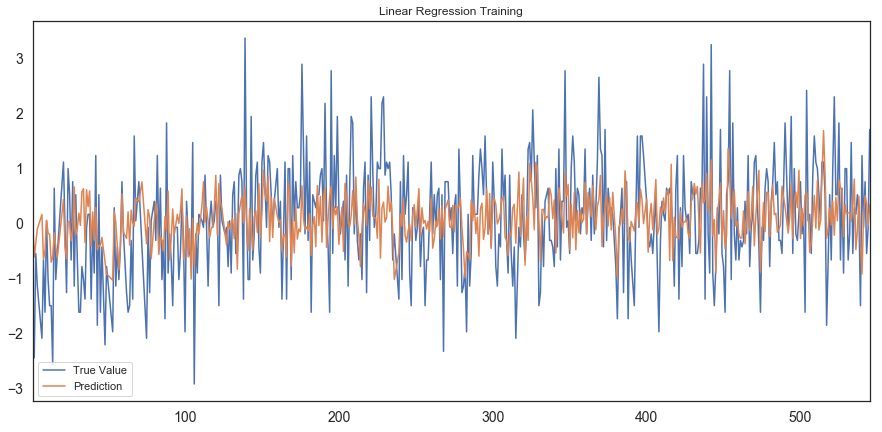

adj train r^2 = 0.019116950857785087
train mse = 0.8383365348194087


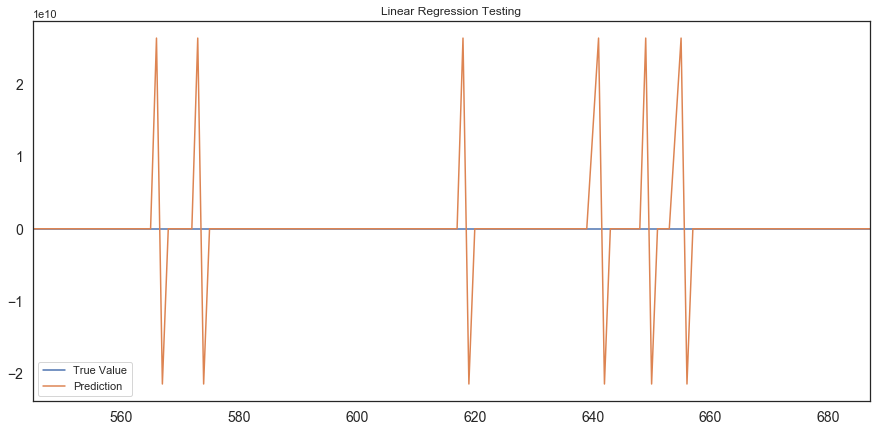

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Rest', 'CurrRest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home']
adj test r^2 = -8.6706311379513e+19
test mse = 5.3392837757076955e+19


In [43]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### SARIMAX

In [45]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df4['PredPts'],seasonal=True,m=12).summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a d

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  644
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -886.514
Date:                Sat, 25 May 2019   AIC                           1779.028
Time:                        16:07:41   BIC                           1792.426
Sample:                             0   HQIC                          1784.227
                                - 644                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.002      0.742      0.458      -0.002       0.005
ma.L1         -0.9563      0.013    -74.697      0.000      -0.981      -0.931
sigma2         0.9192      0.050     18.531      0.000       0.822       1.016
===================================================================================
Ljung-Box (Q):                       36.91   Jarque-Bera (JB):                 6.05
Prob(Q):                              0.61   Prob(JB):                         0.05
Heteroskedasticity (H):               0.79   Skew:                             0.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
trainvals = train_x.columns

In [49]:
exog = train[trainvals].values
model = SARIMAX(train['PredPts'],exog=exog,order=(0,1,1),enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountere

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                PredPts   No. Observations:                  515
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -663.517
Date:                Sat, 25 May 2019   AIC                           1641.034
Time:                        16:09:28   BIC                           2306.451
Sample:                             0   HQIC                          1901.878
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0112      0.072      0.155      0.877      -0.131       0.153
x2            -0.0871      0.062     -1.415      0.157      -0.208       0.034
x3             0.0118      0.081      0.147      0.883      -0.146       0.170
x4            -0.1192      0.085     -1.410      0.159      -0.285       0.047
x5             0.1497      0.094      1.596      0.111      -0.034       0.334
x6             0.1069      0.105      1.022      0.307      -0.098       0.312
x7            -0.1374      0.131     -1.046      0.295      -0.395       0.120
x8             0.1402      0.046      3.075      0.002       0.051       0.229
x9            -0.0726      0.032     -2.245      0.025      -0.136      -0.009
x10           -0.0098      0.026     -0.377      0.706      -0.061       0.041
x11            0.1389      0.053      2.628      0.009       0.035       0.242
x12            0.0147      0.048      0.303      0.762      -0.080       0.110
x13           -0.0258      0.050     -0.515      0.607      -0.124       0.072
x14            0.0913      0.048      1.891      0.059      -0.003       0.186
x15            0.0399      0.052      0.774      0.439      -0.061       0.141
x16            0.0073      0.051      0.144      0.885      -0.092       0.107
x17           -0.0393      0.020     -1.993      0.046      -0.078      -0.001
x18            0.2123      0.993      0.214      0.831      -1.734       2.159
x19           -0.0415      0.038     -1.100      0.272      -0.115       0.032
x20            0.0784      0.107      0.733      0.464      -0.131       0.288
x21            0.0602      0.112      0.539      0.590      -0.158       0.279
x22           -0.1351      0.101     -1.338      0.181      -0.333       0.063
x23            0.2338      0.109      2.140      0.032       0.020       0.448
x24           -0.0319      0.134     -0.239      0.811      -0.294       0.230
x25           -0.1866      0.135     -1.378      0.168      -0.452       0.079
x26            0.0188      0.092      0.204      0.839      -0.162       0.200
x27            0.0334      0.108      0.311      0.756      -0.177       0.244
const      -1.027e-16   1.08e-14     -0.010      0.992   -2.12e-14     2.1e-14
x28        -4.535e-16   7.78e-15     -0.058      0.953   -1.57e-14    1.48e-14
x29            0.2039      0.112      1.824      0.068      -0.015       0.423
x30            0.0044      0.135      0.033      0.974      -0.259       0.268
x31           -0.1121      0.132     -0.847      0.397      -0.371       0.147
x32           -0.0625      0.144     -0.435      0.664      -0.345       0.220
x33           -0.0465      0.101     -0.463      0.644      -0.244       0.151
x34           -0.1848      0.087     -2.132      0.033      -0.355      -0.015
x35            0.1684      0.150      1.121      0.262      -0.126       0.463
x36            0.0712      0.134      0.531      0.595      -0.192       0.334
x37            0.0623      0.112      0.557      0.577      -0.157       0.281
x3

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


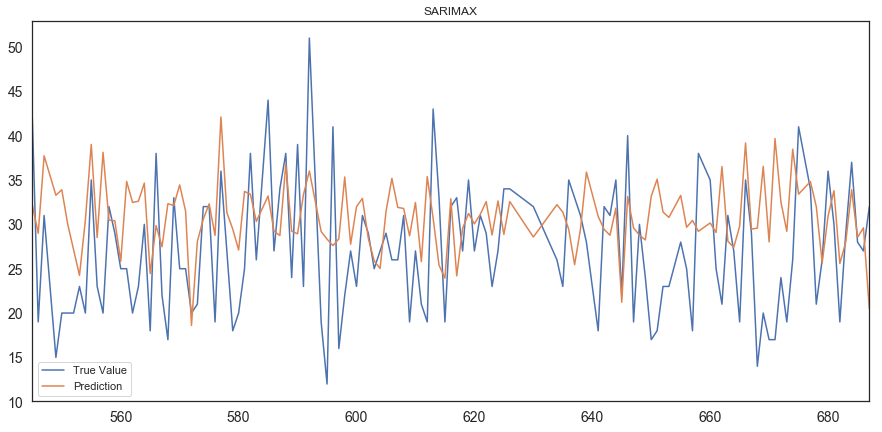

adj test r^2 = -0.6354400899111394
test mse = 71.43220780332274


In [64]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[trainvals]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=True)
test_y2['prediction']=sc2.inverse_transform(predictions.values)
test_y2['PredPts']=sc2.inverse_transform(test_y2['PredPts'])
test_y2['PredPts'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Extra Trees

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

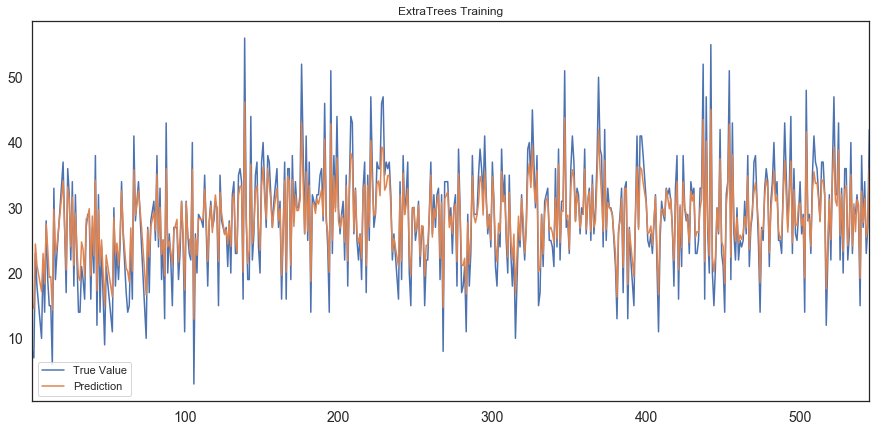

adj train r^2 = 0.8329061907141433
train mse = 0.1428109550766336


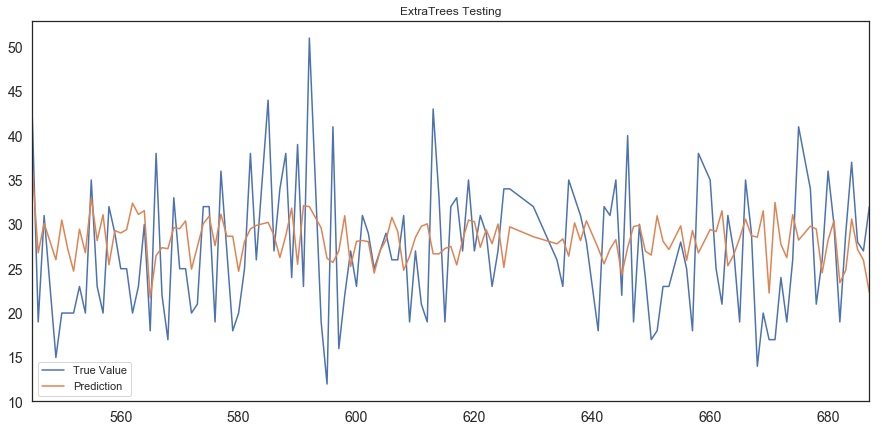

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Rest', 'CurrRest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home']
adj test r^2 = -0.25551240078441384
test mse = 54.83785267692308


In [55]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Random Forrest

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

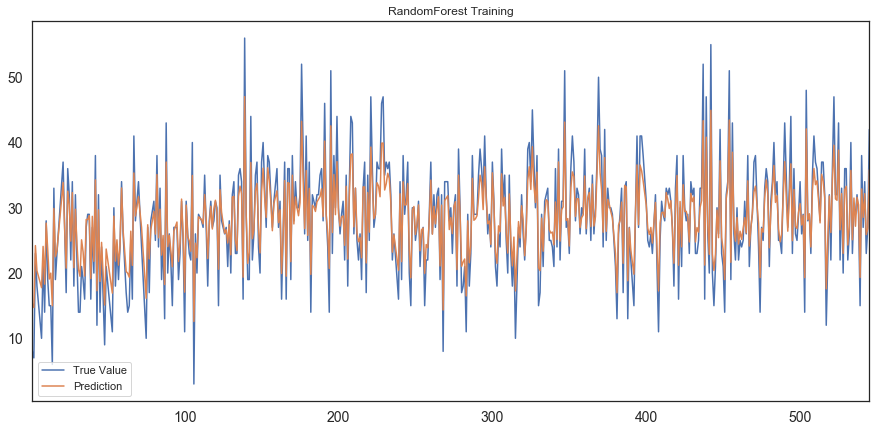

adj train r^2 = 0.8332450832124935
train mse = 0.14252131202184573


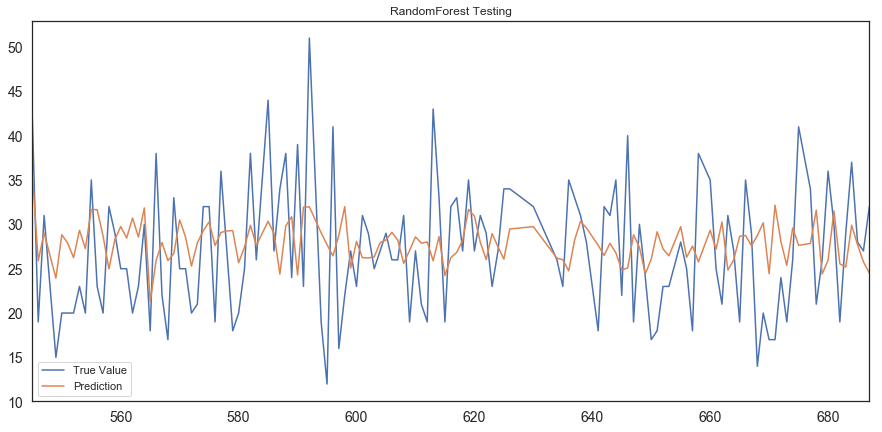

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Rest', 'CurrRest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home']
adj test r^2 = -0.25505092819455877
test mse = 54.81769663076924


In [57]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### XGBoost

In [58]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

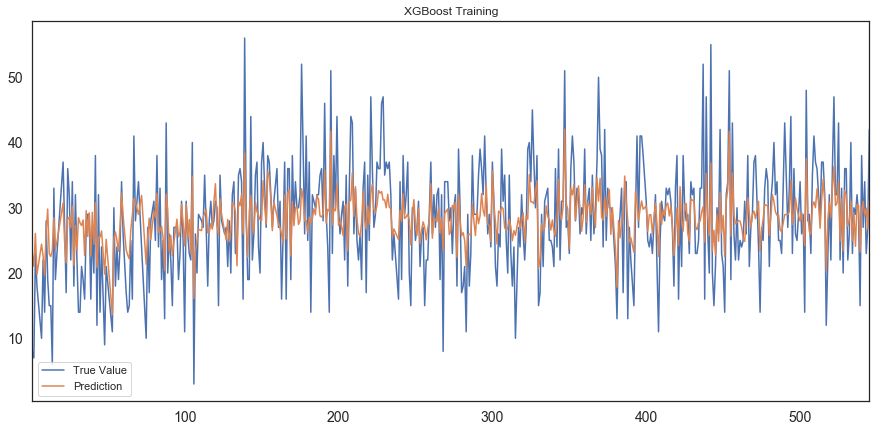

adj train r^2 = 0.358522125756759
train mse = 0.5482553080376752


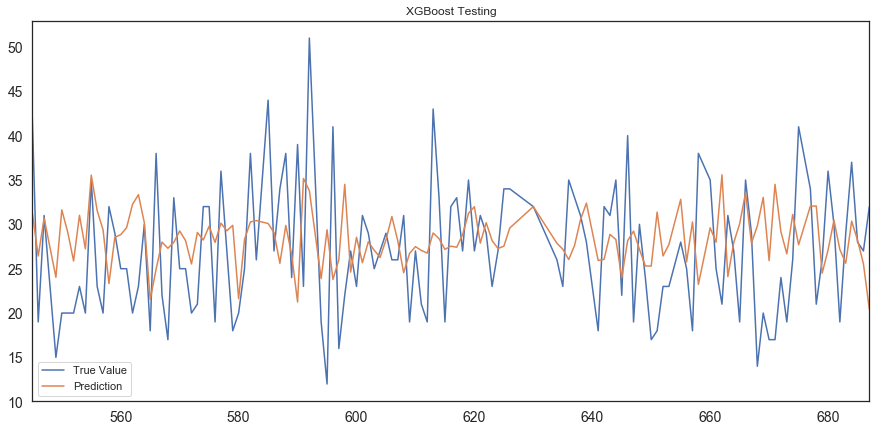

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Rest', 'CurrRest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home']
adj test r^2 = -0.40370175166847977
test mse = 61.31041781207593


In [59]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Feed Forward Neural Network

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [62]:
model = Sequential()
model.add(Dense(128, input_dim=87, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 515 samples, validate on 130 samples
Epoch 1/500
515/515 [==============================] - 1s 2ms/step - loss: 33.1181 - val_loss: 28.2239
Epoch 2/500
515/515 [==============================] - 0s 109us/step - loss: 25.2930 - val_loss: 21.4069
Epoch 3/500
515/515 [==============================] - 0s 81us/step - loss: 19.1519 - val_loss: 16.1056
Epoch 4/500
515/515 [==============================] - 0s 89us/step - loss: 14.4408 - val_loss: 12.0986
Epoch 5/500
515/515 [==============================] - 0s 87us/step - loss: 10.9171 - val_loss: 9.1040
Epoch 6/500
515/515 [==============================] - 0s 89us/step - loss: 8.2636 - val_loss: 6.8763
Epoch 7/500
515/515 [==============================] - 0s 83us/step - loss: 6.3050 - val_loss: 5.2358
Epoch 8/500
515/515 [==============================] - 0s 89us/step - loss: 4.8659 - val_loss: 4.0373
Epoch 9/500
515/515 [==============================] - 0s 89us/step - loss: 3.824

515/515 [==============================] - 0s 79us/step - loss: 1.0442 - val_loss: 0.8111
Epoch 78/500
515/515 [==============================] - 0s 85us/step - loss: 1.0422 - val_loss: 0.8124
Epoch 79/500
515/515 [==============================] - 0s 79us/step - loss: 1.0442 - val_loss: 0.8135
Epoch 80/500
515/515 [==============================] - 0s 74us/step - loss: 1.0437 - val_loss: 0.8124
Epoch 81/500
515/515 [==============================] - 0s 79us/step - loss: 1.0421 - val_loss: 0.8137
Epoch 82/500
515/515 [==============================] - 0s 76us/step - loss: 1.0463 - val_loss: 0.8119
Epoch 83/500
515/515 [==============================] - 0s 76us/step - loss: 1.0443 - val_loss: 0.8092
Epoch 84/500
515/515 [==============================] - 0s 77us/step - loss: 1.0439 - val_loss: 0.8076
Epoch 85/500
515/515 [==============================] - 0s 77us/step - loss: 1.0453 - val_loss: 0.8087
Epoch 86/500
515/515 [==============================] - 0s 76us/step - loss: 1.0405 - 

515/515 [==============================] - 0s 79us/step - loss: 1.0383 - val_loss: 0.8172
Epoch 157/500
515/515 [==============================] - 0s 83us/step - loss: 1.0337 - val_loss: 0.8175
Epoch 158/500
515/515 [==============================] - 0s 81us/step - loss: 1.0369 - val_loss: 0.8164
Epoch 159/500
515/515 [==============================] - 0s 79us/step - loss: 1.0338 - val_loss: 0.8170
Epoch 160/500
515/515 [==============================] - 0s 74us/step - loss: 1.0355 - val_loss: 0.8207
Epoch 161/500
515/515 [==============================] - 0s 79us/step - loss: 1.0335 - val_loss: 0.8182
Epoch 162/500
515/515 [==============================] - 0s 77us/step - loss: 1.0375 - val_loss: 0.8176
Epoch 163/500
515/515 [==============================] - 0s 77us/step - loss: 1.0301 - val_loss: 0.8195
Epoch 164/500
515/515 [==============================] - 0s 74us/step - loss: 1.0335 - val_loss: 0.8179
Epoch 165/500
515/515 [==============================] - 0s 72us/step - loss: 

Epoch 235/500
515/515 [==============================] - 0s 81us/step - loss: 1.0330 - val_loss: 0.8367
Epoch 236/500
515/515 [==============================] - 0s 77us/step - loss: 1.0294 - val_loss: 0.8363
Epoch 237/500
515/515 [==============================] - 0s 76us/step - loss: 1.0318 - val_loss: 0.8379
Epoch 238/500
515/515 [==============================] - 0s 76us/step - loss: 1.0391 - val_loss: 0.8376
Epoch 239/500
515/515 [==============================] - 0s 79us/step - loss: 1.0365 - val_loss: 0.8323
Epoch 240/500
515/515 [==============================] - 0s 76us/step - loss: 1.0301 - val_loss: 0.8344
Epoch 241/500
515/515 [==============================] - 0s 76us/step - loss: 1.0316 - val_loss: 0.8355
Epoch 242/500
515/515 [==============================] - 0s 79us/step - loss: 1.0255 - val_loss: 0.8454
Epoch 243/500
515/515 [==============================] - 0s 76us/step - loss: 1.0282 - val_loss: 0.8447
Epoch 244/500
515/515 [==============================] - 0s 77us

Epoch 314/500
515/515 [==============================] - 0s 81us/step - loss: 1.0204 - val_loss: 0.8644
Epoch 315/500
515/515 [==============================] - 0s 81us/step - loss: 1.0218 - val_loss: 0.8666
Epoch 316/500
515/515 [==============================] - 0s 68us/step - loss: 1.0231 - val_loss: 0.8654
Epoch 317/500
515/515 [==============================] - 0s 72us/step - loss: 1.0253 - val_loss: 0.8622
Epoch 318/500
515/515 [==============================] - 0s 76us/step - loss: 1.0190 - val_loss: 0.8597
Epoch 319/500
515/515 [==============================] - 0s 76us/step - loss: 1.0258 - val_loss: 0.8582
Epoch 320/500
515/515 [==============================] - 0s 76us/step - loss: 1.0272 - val_loss: 0.8636
Epoch 321/500
515/515 [==============================] - 0s 72us/step - loss: 1.0329 - val_loss: 0.8686
Epoch 322/500
515/515 [==============================] - 0s 76us/step - loss: 1.0383 - val_loss: 0.8688
Epoch 323/500
515/515 [==============================] - 0s 76us

Epoch 393/500
515/515 [==============================] - 0s 79us/step - loss: 1.0139 - val_loss: 0.8758
Epoch 394/500
515/515 [==============================] - 0s 79us/step - loss: 1.0194 - val_loss: 0.8738
Epoch 395/500
515/515 [==============================] - 0s 74us/step - loss: 1.0246 - val_loss: 0.8700
Epoch 396/500
515/515 [==============================] - 0s 68us/step - loss: 1.0209 - val_loss: 0.8725
Epoch 397/500
515/515 [==============================] - 0s 76us/step - loss: 1.0197 - val_loss: 0.8725
Epoch 398/500
515/515 [==============================] - 0s 76us/step - loss: 1.0162 - val_loss: 0.8742
Epoch 399/500
515/515 [==============================] - 0s 76us/step - loss: 1.0076 - val_loss: 0.8768
Epoch 400/500
515/515 [==============================] - 0s 76us/step - loss: 1.0088 - val_loss: 0.8741
Epoch 401/500
515/515 [==============================] - 0s 81us/step - loss: 1.0101 - val_loss: 0.8648
Epoch 402/500
515/515 [==============================] - 0s 72us

Epoch 472/500
515/515 [==============================] - 0s 79us/step - loss: 1.0048 - val_loss: 0.8804
Epoch 473/500
515/515 [==============================] - 0s 81us/step - loss: 1.0050 - val_loss: 0.8710
Epoch 474/500
515/515 [==============================] - 0s 68us/step - loss: 1.0027 - val_loss: 0.8762
Epoch 475/500
515/515 [==============================] - 0s 76us/step - loss: 1.0168 - val_loss: 0.8709
Epoch 476/500
515/515 [==============================] - 0s 76us/step - loss: 1.0147 - val_loss: 0.8734
Epoch 477/500
515/515 [==============================] - 0s 76us/step - loss: 1.0135 - val_loss: 0.8810
Epoch 478/500
515/515 [==============================] - 0s 70us/step - loss: 1.0144 - val_loss: 0.8937
Epoch 479/500
515/515 [==============================] - 0s 70us/step - loss: 1.0246 - val_loss: 0.8762
Epoch 480/500
515/515 [==============================] - 0s 77us/step - loss: 1.0177 - val_loss: 0.8747
Epoch 481/500
515/515 [==============================] - 0s 76us

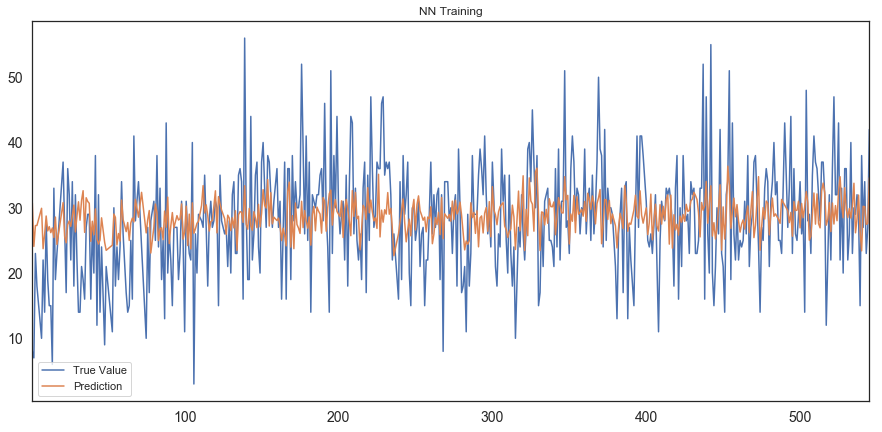

adj train r^2 = -0.03137767950643
train mse = 0.881493049231134


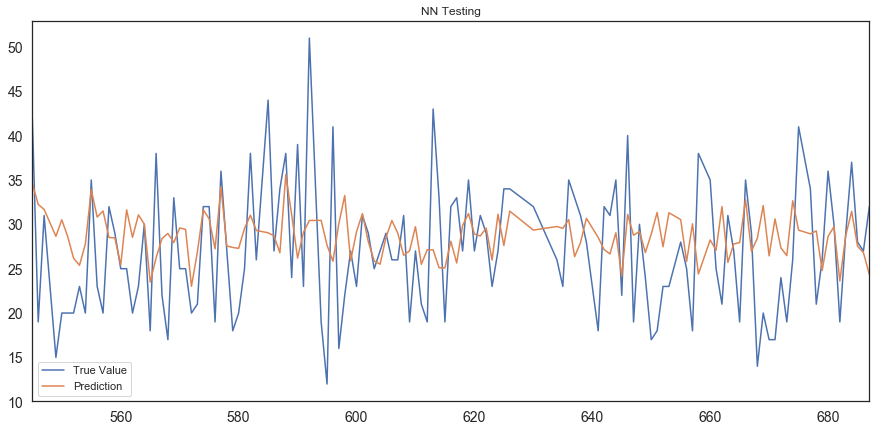

adj test r^2 = -0.2701168735478592
test mse = 55.47574197640396


In [63]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### LSTM

In [65]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [66]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',recurrent_regularizer=regularizers.l2(0.43),recurrent_dropout=.43,return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=100, verbose=1, shuffle=False)

Train on 515 samples, validate on 130 samples
Epoch 1/100
515/515 [==============================] - 13s 26ms/step - loss: 151.5241 - val_loss: 62.4967
Epoch 2/100
515/515 [==============================] - 4s 8ms/step - loss: 35.0057 - val_loss: 13.9972
Epoch 3/100
515/515 [==============================] - 4s 8ms/step - loss: 8.3079 - val_loss: 3.6717
Epoch 4/100
515/515 [==============================] - 4s 8ms/step - loss: 2.5512 - val_loss: 1.4482
Epoch 5/100
515/515 [==============================] - 4s 8ms/step - loss: 1.2580 - val_loss: 0.9821
Epoch 6/100
515/515 [==============================] - 4s 8ms/step - loss: 0.8861 - val_loss: 1.0181
Epoch 7/100
515/515 [==============================] - 4s 8ms/step - loss: 0.7513 - val_loss: 0.9194
Epoch 8/100
515/515 [==============================] - 4s 8ms/step - loss: 0.7486 - val_loss: 0.9939
Epoch 9/100
515/515 [==============================] - 4s 8ms/step - loss: 0.6802 - val_loss: 1.1009
Epoch 10/100
515/515 [================

Epoch 81/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0473 - val_loss: 1.0771
Epoch 82/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0502 - val_loss: 1.0918
Epoch 83/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0503 - val_loss: 1.0283
Epoch 84/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0520 - val_loss: 1.0828
Epoch 85/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0467 - val_loss: 1.0908
Epoch 86/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0610 - val_loss: 1.0335
Epoch 87/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0680 - val_loss: 1.0016
Epoch 88/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0543 - val_loss: 1.0547
Epoch 89/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0475 - val_loss: 1.0860
Epoch 90/100
515/515 [==============================] - 4s 8ms/step - loss: 0.0475

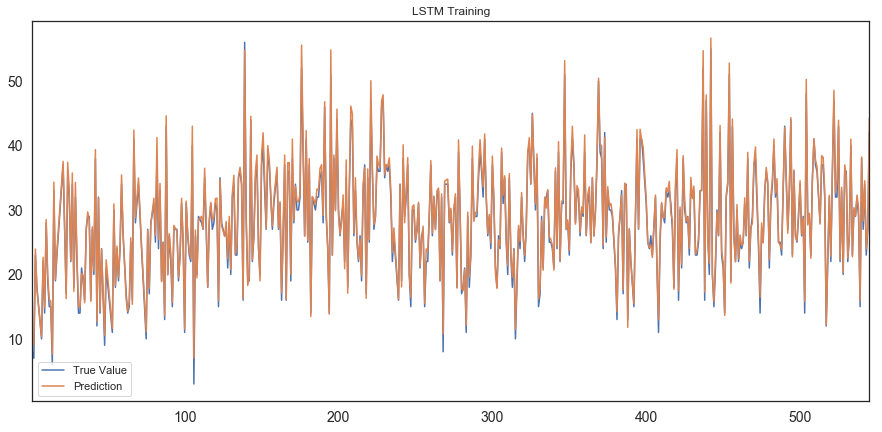

adj train r^2 = 0.9832153842020397
train mse = 0.014345396893791142


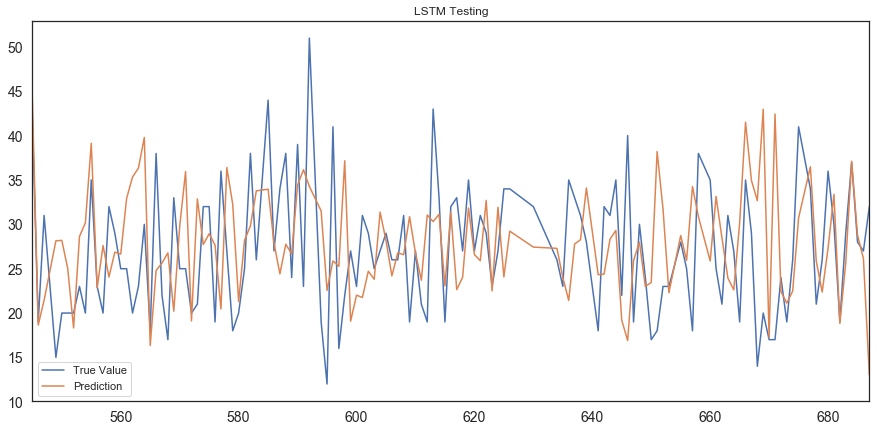

adj test r^2 = -0.7258783767345645
test mse = 75.38234118796933


In [67]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### TPOT

In [68]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



5.020592199999999 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(StandardScaler(KNeighborsRegressor(CombineDFs(KNeighborsRegressor(input_matrix, n_neighbors=4, p=1, weights=distance), KNeighborsRegressor(CombineDFs(KNeighborsRegressor(RobustScaler(input_matrix), n_neighbors=4, p=1, weights=distance), input_matrix), n_neighbors=40, p=2, weights=uniform)), n_neighbors=40, p=2, weights=uniform)), C=0.0001, dual=True, epsilon=0.01, loss=squared_epsilon_insensitive, tol=0.01)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


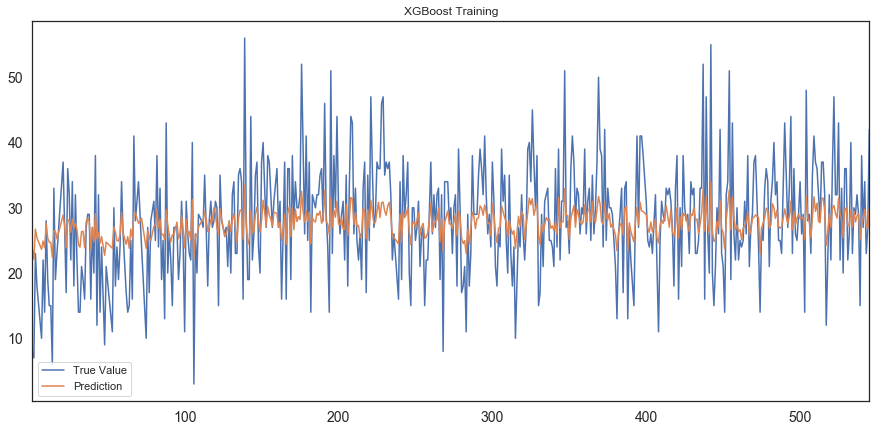

adj train r^2 = 0.2437395353789641
train mse = 45.845815485966206


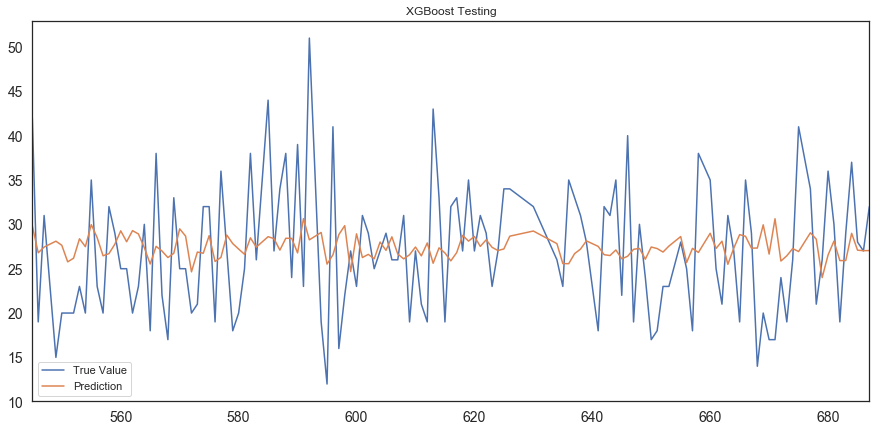

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Rest', 'CurrRest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'Away', 'Home']
adj test r^2 = -0.22443377016839472
test mse = 53.48041059506313


In [72]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PredPts, train_y2.prediction)))
test_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))